In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Classification with Neural Networks

# Pipeline

1. **Import important libraries.**
2. **Get Dataset Ready.**
3. **Build Neural Network Classification Model.**
4. **Pick a Loss function and Optimizer.**
5. **Build a training loop.**
6. **Evaluate the model.**
7. **Optimize the model.**
8. **Save the model.**

## 1. Import important libraries.

In [55]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [56]:
help(request=DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(dataset: torch.utils.data.dataset.Dataset[+T_co], batch_size: Optional[int] = 1, shuffle: Optional[bool] = None, sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None, batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None, num_workers: int = 0, collate_fn: Optional[Callable[[List[~T]], Any]] = None, pin_memory: bool = False, drop_last: bool = False, timeout: float = 0, worker_init_fn: Optional[Callable[[int], NoneType]] = None, multiprocessing_context=None, generator=None, *, prefetch_factor: Optional[int] = None, persistent_workers: bool = False, pin_memory_device: str = '')
 |
 |  Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.
 |
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loadi

The `DataLoader` class in PyTorch is used to load data in batches for training and evaluation. 

```python
DataLoader(
    dataset=dataset,                # Source dataset to load data from
    batch_size=1,                   # Number of samples per batch
    shuffle=False,                  # Whether to reshuffle data at every epoch
    sampler=None,                   # Custom sampling strategy
    batch_sampler=None,             # Custom batch sampling strategy
    num_workers=0,                  # Number of subprocesses for data loading (0 means main process)
    collate_fn=None,                # Function to merge samples into batches
    pin_memory=False,               # Copy tensors to CUDA pinned memory
    drop_last=False,                # Drop the last incomplete batch
    timeout=0,                      # Timeout for collecting a batch from workers
    worker_init_fn=None,            # Function to initialize worker processes
    multiprocessing_context=None,   # Multiprocessing context to use
)
```

**Create a DataLoader:**

```python
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)
```

**Iterate over the data:**

```python
for batch in dataloader:
    print(batch)
```

In [57]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

In [58]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

## 2. Get Dataset Ready.

In [59]:
train_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

In [60]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [61]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [62]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [63]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [64]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Converting Data into Batches

In [65]:
import multiprocessing

num_cores: int = multiprocessing.cpu_count()
# Use at least 1 worker, but leave 2 cores free
num_workers: int = max(1, num_cores - 2)

print(f"Number of CPU cores: {num_cores}")
print(f"Number of workers: {num_workers}")

Number of CPU cores: 4
Number of workers: 2


In [66]:
device = torch.device(device="cuda" if torch.cuda.is_available() else "cpu")
device.type

'cpu'

In [67]:
BATCH_SIZE = 64

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True if device.type == "cuda" else False,
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True if device.type == "cuda" else False,
)

1. **Batch Size (BATCH_SIZE = 64)**:
   - Why: Batch size is the number of samples processed before the model is updated.
   - Best practice: 
     - Use powers of 2 (32, 64, 128, etc.) as they can be more efficiently processed by GPUs.
     - 64 is a common choice that balances between speed and memory usage.
     - Larger batch sizes generally mean faster training but may require more memory.

2. **DataLoader for Training (train_dataloader)**:
   - `dataset=train_data`: Uses the training dataset.
   - `batch_size=BATCH_SIZE`: Processes 64 samples at a time.
   - `shuffle=True`: 
     - Why: Shuffling helps prevent the model from learning the order of the training data.
     - Best practice: Always shuffle training data to improve generalization and prevent overfitting.

3. **DataLoader for Testing (test_dataloader)**:
   - `dataset=test_data`: Uses the test dataset.
   - `batch_size=BATCH_SIZE`: Keeps the same batch size as training for consistency.
   - `shuffle=False`:
     - Why: For test data, we typically don't need to shuffle.
     - Best practice: Keep test data in a consistent order for reproducibility and easier error analysis.

4. **Using Separate DataLoaders for Training and Testing**:
   - Why: Training and testing phases have different requirements.
   - Best practice: 
     - Separate data handling for training and testing allows for different configurations.
     - It's cleaner and more modular, making the code easier to understand and maintain.

5. **Consistent BATCH_SIZE**:
   - Why: Using the same batch size for both training and testing simplifies code and ensures consistent memory usage.
   - Best practice: 
     - Maintain consistency where possible, but be aware that you can use different batch sizes if needed (e.g., larger batch size for testing if memory allows).

6. **DataLoader Usage**:
   - Why: DataLoader provides an efficient way to load data in batches and apply transformations.
   - Best practice:
     - Use DataLoader instead of manually batching data.
     - It handles **multi-threading**, **batching**, and **shuffling efficiently**.

Additional Best Practices:
- Consider using `num_workers` parameter in DataLoader for parallel data loading, especially with large datasets.
- If using GPU, consider setting `pin_memory=True` for faster data transfer to GPU.
- Adjust batch size based on your model size and available memory.

In [68]:
print(len(train_data) / BATCH_SIZE)
print(len(train_dataloader))

937.5
938


In [69]:
print(len(test_data) / BATCH_SIZE)
print(len(test_dataloader))

156.25
157


## 3. Build Neural Network Classification Model

In [70]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim) -> None:
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_features=in_dim, out_features=n_hidden_1),
            nn.ReLU(inplace=True),
        )
        self.layer2 = nn.Sequential(
            nn.Linear(in_features=n_hidden_1, out_features=n_hidden_2),
            nn.ReLU(inplace=True),
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=n_hidden_2, out_features=out_dim),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        return x3

In [71]:
INPUT_DIMENSION = 28 * 28
N_HIDDEN_1 = 300
N_HIDDEN_2 = 100
OUTPUT_DIMENSION = 10

In [72]:
MODEL = NeuralNetwork(
    in_dim=INPUT_DIMENSION,
    n_hidden_1=N_HIDDEN_1,
    n_hidden_2=N_HIDDEN_2,
    out_dim=OUTPUT_DIMENSION,
)

print(MODEL)

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)


In [73]:
dir(MODEL)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [74]:
MODEL.parameters

<bound method Module.parameters of NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)>

In [75]:
MODEL.to(device=device)

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

## 4. Pick a Loss function and Optimizer.

In [84]:
LEARNING_RATE = 1e-3


# Calculate the Loss
criterion = nn.CrossEntropyLoss()
# Update parameters (weights and biases) w.r.t the Loss
optimizer = torch.optim.Adam(params=MODEL.parameters(), lr=LEARNING_RATE)

print(criterion)
print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## 5. Build the Training Loop


In [85]:
%%time
EPOCH = 10

for epoch in range(EPOCH):
    print("*" * 50)
    print(f"Epoch: {epoch+1}")
    RUNNING_LOSS = 0.0
    RUNNING_ACCURACY = 0.0

    for batch_idx, data in enumerate(iterable=train_dataloader, start=1):
        image, label = data
        image = image.view(image.size(0), -1)
        image = image.to(device=device)
        label = label.to(device=device)

        output = MODEL(image)

        loss = criterion(output, label)

        RUNNING_LOSS += loss.item()

        _, predicted = torch.max(input=output, dim=1)
        RUNNING_ACCURACY += (predicted == label).float().mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print(
                f"EPOCH: {epoch+1} / {EPOCH}, LOSS: {RUNNING_LOSS/batch_idx:.4f}, ACCURACY: {RUNNING_ACCURACY/batch_idx:.4f}"
            )


**************************************************
Epoch: 1
EPOCH: 1 / 10, LOSS: 1.4014, ACCURACY: 0.4980
EPOCH: 1 / 10, LOSS: 1.3612, ACCURACY: 0.5034
EPOCH: 1 / 10, LOSS: 1.3359, ACCURACY: 0.5077
EPOCH: 1 / 10, LOSS: 1.3159, ACCURACY: 0.5099
**************************************************
Epoch: 2
EPOCH: 2 / 10, LOSS: 1.2168, ACCURACY: 0.5312
EPOCH: 2 / 10, LOSS: 1.2176, ACCURACY: 0.5302
EPOCH: 2 / 10, LOSS: 1.2149, ACCURACY: 0.5301
EPOCH: 2 / 10, LOSS: 1.2135, ACCURACY: 0.5292
**************************************************
Epoch: 3
EPOCH: 3 / 10, LOSS: 1.0150, ACCURACY: 0.6158
EPOCH: 3 / 10, LOSS: 1.0130, ACCURACY: 0.6161
EPOCH: 3 / 10, LOSS: 1.0087, ACCURACY: 0.6171
EPOCH: 3 / 10, LOSS: 1.0048, ACCURACY: 0.6188
**************************************************
Epoch: 4
EPOCH: 4 / 10, LOSS: 0.9826, ACCURACY: 0.6229
EPOCH: 4 / 10, LOSS: 0.9837, ACCURACY: 0.6229
EPOCH: 4 / 10, LOSS: 0.9759, ACCURACY: 0.6258
EPOCH: 4 / 10, LOSS: 0.9760, ACCURACY: 0.6264
************************

## 6. Evaluate the Model

In [88]:
MODEL.eval()
eval_loss = 0.0
eval_accuracy = 0.0

for batch_idx, data in enumerate(iterable=test_dataloader, start=1):
    image, label = data
    image = image.view(image.size(0), -1)
    image = image.to(device=device)
    label = label.to(device=device)

    with torch.no_grad():
        output = MODEL(image)

        loss = criterion(output, label)

        eval_loss += loss.item()

        _, predicted = torch.max(input=output, dim=1)
        eval_accuracy += (predicted == label).float().mean()
    print(
        f"Test Loss: {eval_loss/len(test_dataloader):.4f}, Test Accuracy: {eval_accuracy/len(test_dataloader):.4f}"
    )

Test Loss: 0.0071, Test Accuracy: 0.0038
Test Loss: 0.0123, Test Accuracy: 0.0083
Test Loss: 0.0195, Test Accuracy: 0.0117
Test Loss: 0.0254, Test Accuracy: 0.0160
Test Loss: 0.0304, Test Accuracy: 0.0204
Test Loss: 0.0370, Test Accuracy: 0.0243
Test Loss: 0.0439, Test Accuracy: 0.0279
Test Loss: 0.0484, Test Accuracy: 0.0325
Test Loss: 0.0554, Test Accuracy: 0.0358
Test Loss: 0.0605, Test Accuracy: 0.0403
Test Loss: 0.0677, Test Accuracy: 0.0438
Test Loss: 0.0744, Test Accuracy: 0.0482
Test Loss: 0.0824, Test Accuracy: 0.0515
Test Loss: 0.0886, Test Accuracy: 0.0553
Test Loss: 0.0961, Test Accuracy: 0.0589
Test Loss: 0.1023, Test Accuracy: 0.0631
Test Loss: 0.1099, Test Accuracy: 0.0665
Test Loss: 0.1167, Test Accuracy: 0.0702
Test Loss: 0.1234, Test Accuracy: 0.0737
Test Loss: 0.1300, Test Accuracy: 0.0774
Test Loss: 0.1378, Test Accuracy: 0.0810
Test Loss: 0.1443, Test Accuracy: 0.0847
Test Loss: 0.1513, Test Accuracy: 0.0882
Test Loss: 0.1583, Test Accuracy: 0.0917
Test Loss: 0.162

## 7. Visualize the Model Inference

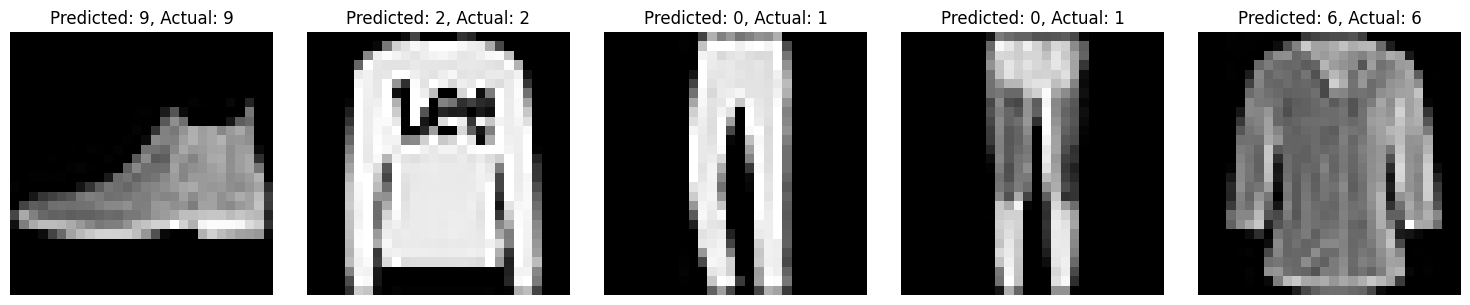

In [95]:
import matplotlib.pyplot as plt
import torch

images, labels = next(iter(test_dataloader))
images = images.reshape(-1, 28 * 28).to(device=device)
labels = labels.to(device=device)
outputs = MODEL(images)

_, predicted = torch.max(input=outputs, dim=1)

fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns
for i in range(5):
    # Convert PyTorch tensor to a 2D list (which matplotlib can handle)
    img_list = images[i].reshape(28, 28).cpu().tolist()
    axs[i].imshow(img_list, cmap="gray")
    axs[i].set_title(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()

## 8. Save the Model

In [ ]:
MODEL.state_dict()

In [ ]:
torch.save(obj=MODEL.state_dict(), f="./models/NeuralNetworkModel.pt")